In [49]:
import os
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import random
import math
import time

In [50]:
#imgref = cv2.imread("cereal.jpg")
#reference1 = cv2.cvtColor(imgref,cv2.COLOR_BGR2RGB)
#referencegray1 = cv2.cvtColor(reference1, cv2.COLOR_BGR2GRAY)

targetl = cv2.imread('computers_left.png')
targetr = cv2.imread('computers_right.png')
targettl = cv2.imread('daft_punk_left.jpg')
targettr = cv2.imread('daft_punk_right.jpg')

## 1.1 Feature Matching

In [51]:
def Matches(image1,image2):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    my_SIFT_instance = cv2.SIFT_create()

    keypoints_1, descriptors_1 = my_SIFT_instance.detectAndCompute(image1,None)
    keypoints_2, descriptors_2 = my_SIFT_instance.detectAndCompute(image2,None)
    
    feature = cv2.FlannBasedMatcher(dict(algorithm = 0, trees = 5), dict(checks = 50) ) #NOTE init Flann
    matches = feature.knnMatch(descriptors_1,descriptors_2, k=2) 
    
    good = []
    mdis = []
    right = []
    left = []
    keypright = []
    keypleft = []
    MatchDistance = []
    for m,n in matches:
        md = m.distance
        nd = n.distance
        mdis.append(md) 
        ratio = md / nd
        tau = 0.8
        if ratio < tau:
            good.append([m])
            MatchDistance.append(md) 
            left.append(keypoints_1[m.queryIdx].pt)
            right.append(keypoints_2[m.trainIdx].pt)
    
    left1 = np.asarray(left)  
    right1  = np.asarray(right)
    
    keypleft = [cv2.KeyPoint(left1[i][0], left1[i][1], 1)
                    for i in range(left1.shape[0])]
    keypright = [cv2.KeyPoint(right1[i][0], right1[i][1], 1)
                    for i in range(right1.shape[0])]
       
    img_left = cv2.drawKeypoints(gray1 , keypleft, image1)
    img_right = cv2.drawKeypoints(gray2 , keypright, image2)
    
    return keypoints_1, descriptors_1, keypoints_2, descriptors_2, left, right, img_left, img_right

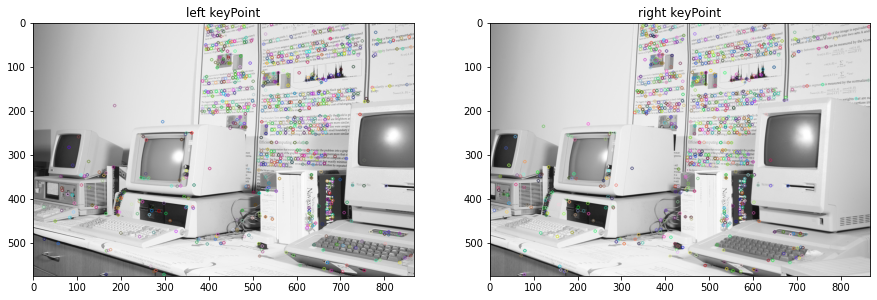

In [52]:
_,_,_,_,_,_,img_left, img_right = Matches(targetl,targetr)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("left keyPoint")
plt.imshow(img_left,cmap = 'gray')

plt.subplot(1,2,2)
plt.title("right keyPoint")
plt.imshow(img_right,cmap = 'gray')

## 1.2 Epipolar Lines Calculation

In [53]:
def drawlines(image1,image2, lines, left,right):
    c = image1.shape[1]
    r = image1.shape[0]
    for r,left,right in zip(lines,left,right):
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        color = tuple(np.random.randint(0,255,size = 3).tolist())
        image1 = cv2.circle(image1,tuple(left),5,color,-1)
        image1 = cv2.line(image1, (x0,y0), (x1,y1), color,1)

    #return image1,image2
    return image1

In [54]:
def Epipolar_Lines(image1,image2):
    leftp = []
    rightp = []
    _,_,_,_,leftp,rightp,_,_, = Matches(image1,image2)
    leftp = np.int32(leftp)
    rightp = np.int32(rightp)
    
    f, mask = cv2.findFundamentalMat(leftp,rightp,cv2.FM_LMEDS)
    
    leftp = leftp[mask.ravel()==1]
    rightp = rightp[mask.ravel()==1]

    
    lineR = cv2.computeCorrespondEpilines(leftp.reshape(-1,1,2), 2, f)
    lineL = cv2.computeCorrespondEpilines(rightp.reshape(-1,1,2), 2, f)
    lineR = lineR.reshape(-1,3)
    lineL = lineL.reshape(-1,3)
    #lineR=lineR.tolist()
    #lineL=lineL.tolist()
    
    left1 = drawlines(image1,image2,lineL,leftp,rightp)
    right1 = drawlines(image2,image1,lineR,rightp,leftp)
    
    return left1, right1
    #return lineL

In [55]:
#Epipolar_Lines(targetl,targetr)

[[ 38 384]
 [ 48 450]
 [ 58 421]
 [ 62 451]
 [ 69 370]
 [ 69 370]
 [ 88 419]
 [ 89 382]
 [ 91 429]
 [ 93 327]
 [ 95 368]
 [ 96 414]
 [106 255]
 [107 255]
 [124 415]
 [126 315]
 [126 312]
 [143 419]
 [150 419]
 [151 358]
 [165 510]
 [174 335]
 [185 187]
 [185 187]
 [185 187]
 [187 415]
 [189 431]
 [191 402]
 [192 420]
 [192 420]
 [193 397]
 [204 341]
 [208 545]
 [223 411]
 [237 433]
 [237 433]
 [237 433]
 [237 433]
 [238 480]
 [239 414]
 [240 414]
 [242 399]
 [244 402]
 [245 352]
 [248 399]
 [249 406]
 [252 440]
 [252 440]
 [253 268]
 [255 340]
 [257 548]
 [258 559]
 [264 436]
 [266 431]
 [269 480]
 [273 234]
 [274 476]
 [278 477]
 [279 563]
 [292 378]
 [294 224]
 [294 224]
 [294 224]
 [294 224]
 [294 224]
 [303 433]
 [313 474]
 [325 474]
 [325 474]
 [331 366]
 [334 468]
 [341 339]
 [341 353]
 [341 252]
 [343 394]
 [343 394]
 [346 253]
 [348 350]
 [349 249]
 [349 417]
 [349 344]
 [358 337]
 [360 441]
 [363 419]
 [364 497]
 [366 368]
 [366 368]
 [379 499]
 [384 490]
 [391  26]
 [393  36]

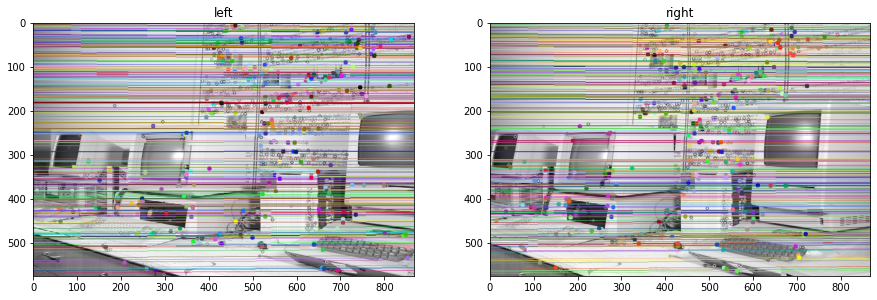

In [56]:
left1, right1 = Epipolar_Lines(targetl,targetr)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("left")
plt.imshow(left1,cmap = 'gray')

plt.subplot(1,2,2)
plt.title("right")
plt.imshow(right1,cmap = 'gray')